<a href="https://colab.research.google.com/github/hamzamufeed/Multimedia_task1/blob/main/Multimedia_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [23]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fftpack import dct, idct
  
from skimage.io import imread
from skimage.color import rgb2gray

from numpy import pi, sin, zeros, r_
from scipy import signal, misc # pip install Pillow
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

# Read Image

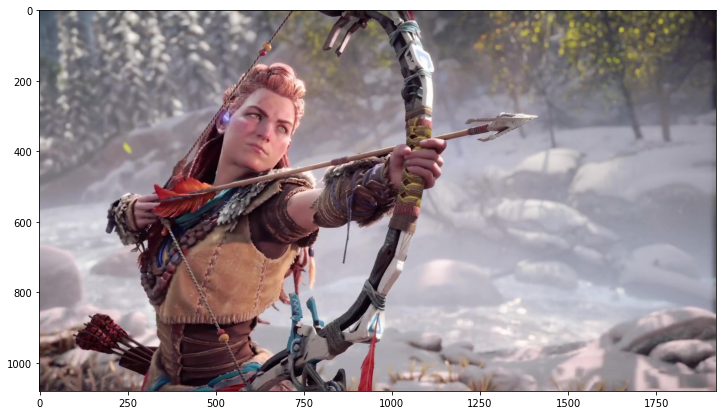

In [24]:
# origin = imread("https://d2skuhm0vrry40.cloudfront.net/2021/articles/2021-07-27-12-23/things-you-didnt-know-about-horizon-zero-dawn-1627385019868.jpg/EG11/resize/1200x-1/things-you-didnt-know-about-horizon-zero-dawn-1627385019868.jpg")
origin = imread("https://s.yimg.com/os/creatr-uploaded-images/2020-06/946863c0-ac28-11ea-bbbf-1c2b2fc98fe0")

f = plt.figure()
plt.imshow(origin)

# Convert Image to Gray

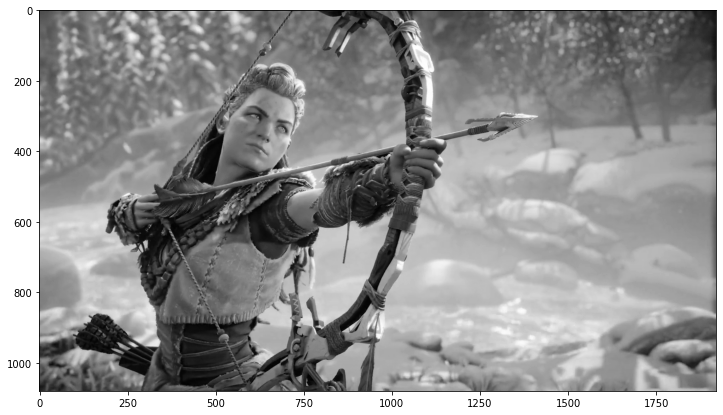

In [25]:
im = rgb2gray(origin)
plt.gray()
plt.imshow(im)

# Define 2D DCT and IDCT

In [26]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

# Apply a 8x8 DCT on image

In [27]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

# Extract a block from image

Text(0.5, 1.0, 'An 8x8 Image block')

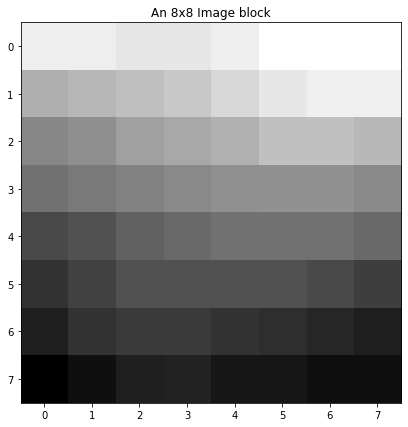

In [28]:
pos = 128 #Index of some random 8x8 block of the image

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Show the DCT of the Block

Text(0.5, 1.0, 'An 8x8 DCT block')

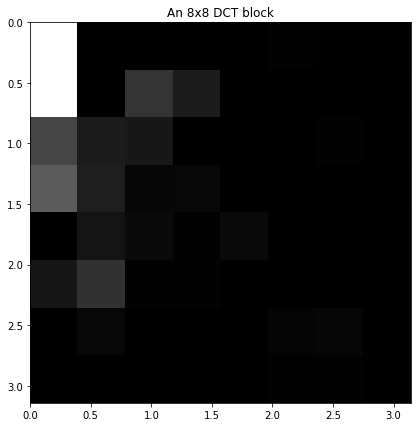

In [29]:
# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

# Apply DCT on the Image

Text(0.5, 1.0, '8x8 DCTs of the image')

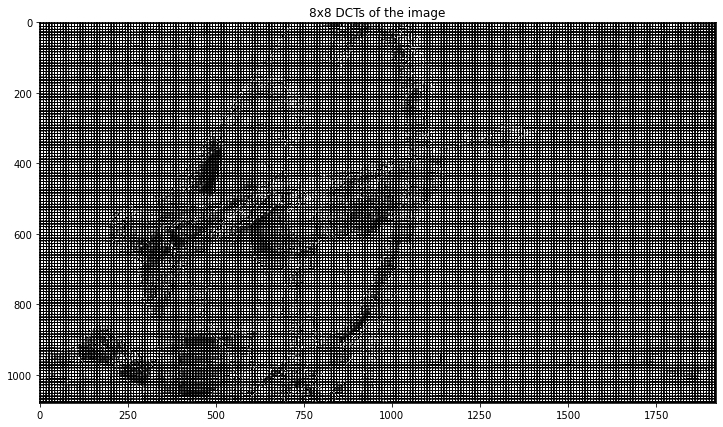

In [30]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

# Set K Coefficients

In [31]:
k = 0.012
dct_thresh = dct * (abs(dct) > (k*np.max(dct)))

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Keeping only 3.820650% of the DCT coefficients


# Show the image after modifying K Coefficients

Text(0.5, 1.0, '8x8 DCTs of the image')

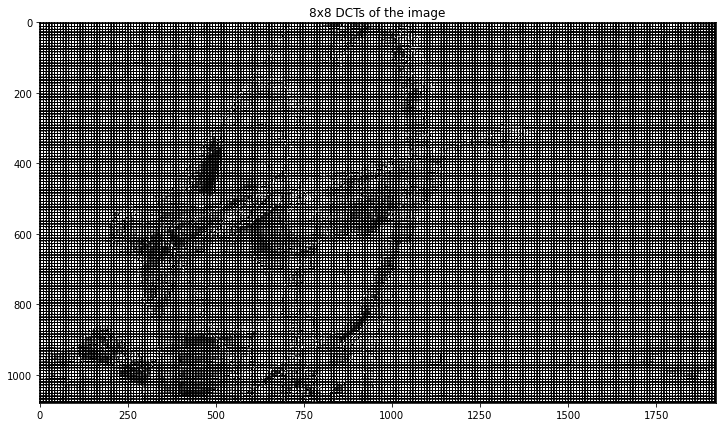

In [32]:
plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

# Apply Inverse DCT on the Image


In [33]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )

# Comparison between original and DCT compressed images

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

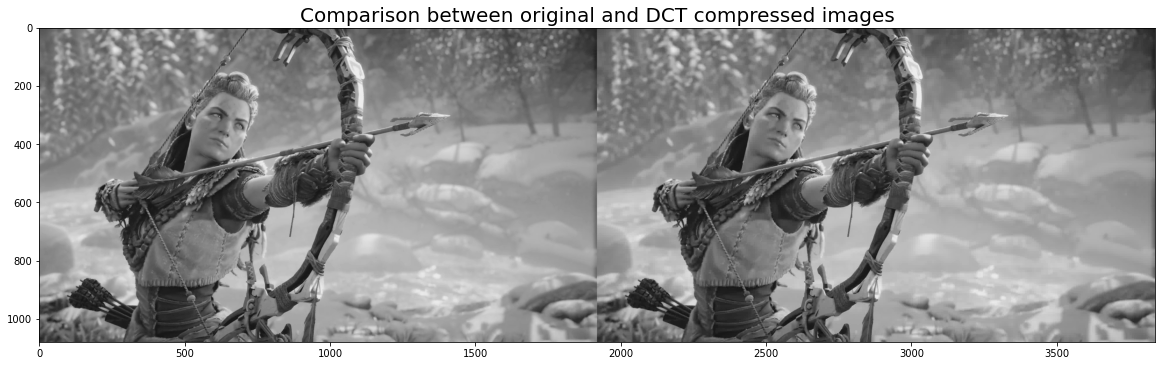

In [34]:
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images", size=20 )

# Applying different Value for K (try 1)



In [35]:
k = 0.09
dct_thresh = dct * (abs(dct) > (k*np.max(dct)))

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Keeping only 1.600984% of the DCT coefficients


## Show the image after modifying K Coefficients

Text(0.5, 1.0, '8x8 DCTs of the image')

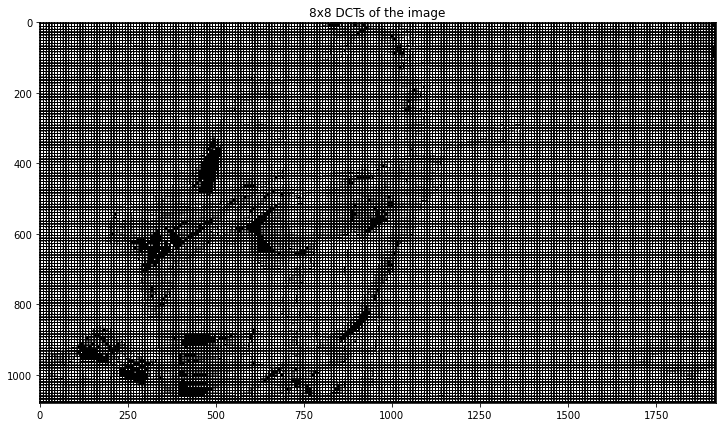

In [36]:
plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

## Apply Inverse DCT on the Image and Compare with the original image

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

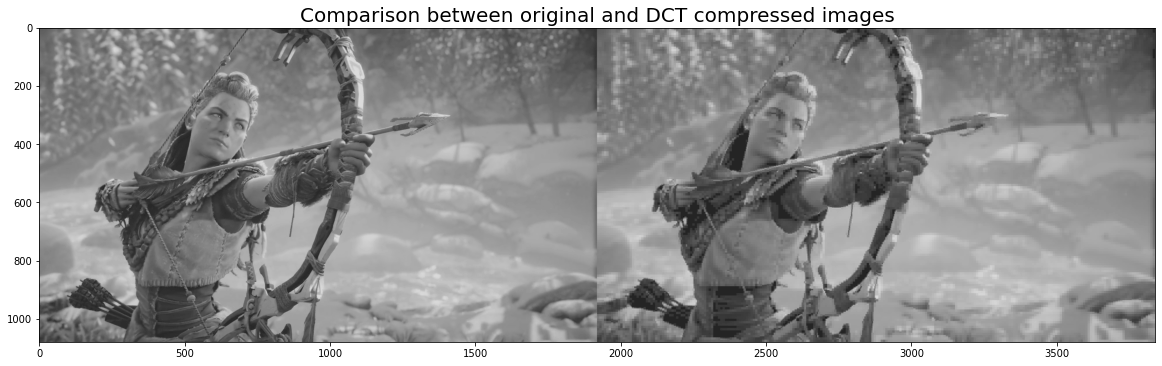

In [37]:
im_dct1 = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct1[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )

plt.figure()
plt.imshow( np.hstack( (im, im_dct1) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images", size=20)

# Applying different Value for K (try 2)

In [38]:
k = 0.5
dct_thresh = dct * (abs(dct) > (k*np.max(dct)))

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Keeping only 0.906250% of the DCT coefficients


## Show the image after modifying K Coefficients

Text(0.5, 1.0, '8x8 DCTs of the image')

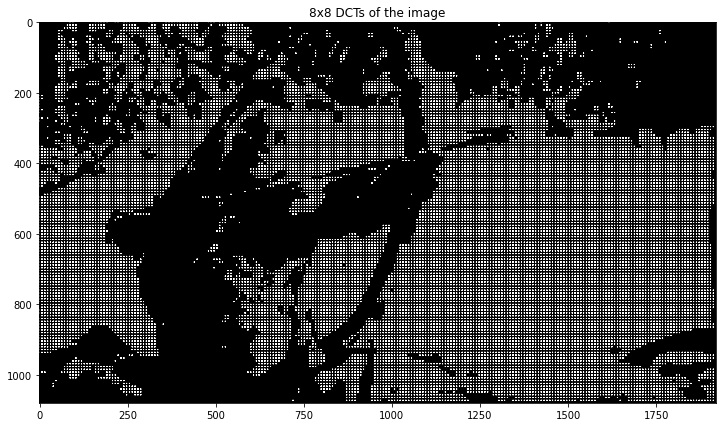

In [39]:
plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

## Apply Inverse DCT on the Image and Compare with the original image

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

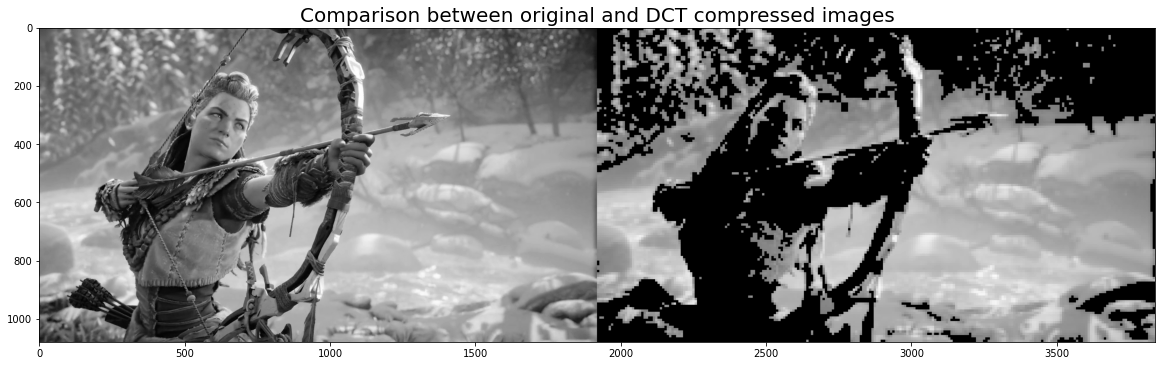

In [40]:
im_dct2 = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct2[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )

plt.figure()
plt.imshow( np.hstack( (im, im_dct2) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images", size=20)

# Conclusion 

K Coefficients represent the bits that will be set to zero, which will generate a black block. When we increase the value of k, more pixels will be set to zero, and this will as well increase the compression and distortion on the image. If we increase K more than a certain threshold, the image will completely black.
The less the value of k, the reconstructed image will be a lot closer to the original image. And less pixels will be converted to zero, which means the image will be less compressed and less distortion.

Text(0.5, 1.0, 'Comparison between original and DCT K = 0.012 | 0.09 | 0.5')

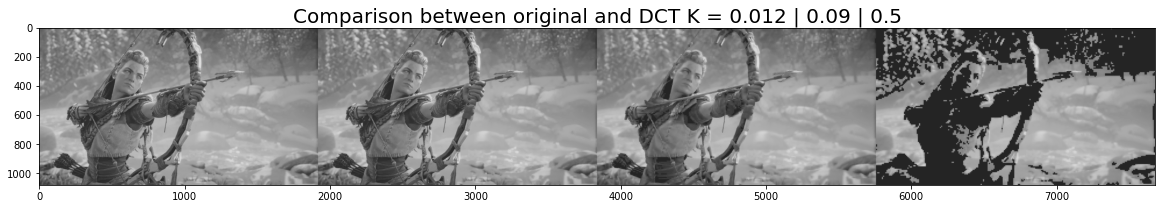

In [42]:
plt.figure()
plt.imshow( np.hstack( (im, im_dct, im_dct1, im_dct2) ) ,cmap='gray')
plt.title("Comparison between original and DCT K = 0.012 | 0.09 | 0.5", size=20)